<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 8

_**Group Members:**_ Phillip Sievers, Gordon Liang, Jose Pablo Rivera 

### Problem 0 (3 points)

## Part 1: The Chain Rule for Differentiation 

### Problem 1.1 (Exam Style)

$$
f(x) = \sin(\arctan(\log(x)))
$$

**Forward Pass:**

$$
a_0 = a(x_0) = \log(e^{\sqrt{3}}) = \sqrt{3}
$$

$$
b_0 = b(a_0) = \arctan(\sqrt{3}) = \frac{\pi}{3}
$$

$$
y_0 = f(x_0) = c(b_0) = \sin\left(\frac{\pi}{3}\right) = \frac{\sqrt{3}}{2} \approx 0.86602
$$

**Backward Pass:**

$$
y'_0 = c'(v_0) = \frac{d}{dv_0}\sin(v_0) = \cos(v_0)
$$

$$
y'_{a_0} = \cos(v_0) \frac{d}{da_0} \arctan(a_0)
$$

$$
y'_{a_0} = \frac{\cos(v_0)}{a_0^2 + 1}
$$

$$
y'_{x_0} = \frac{\cos(v_0)}{a_0^2 + 1} \cdot \frac{d}{dx_0}\log(x_0)
$$

$$
y'_{x_0} = \frac{\cos(v_0)}{a_0^2 + 1} \cdot \frac{1}{x_0}
$$

Plugging in values gives:

$$
y'_{x_0} = \frac{\cos\left(\frac{\pi}{3}\right)}{(\sqrt{3})^2 + 1} \cdot \frac{1}{e^{\sqrt{3}}}
$$

$$
= \frac{\frac{1}{2}}{4} \cdot \frac{1}{e^{\sqrt{3}}}
= \frac{1}{8e^{\sqrt{3}}} \approx 0.02172
$$

### Problem 1.2

Forward pass (final output): 0.8660254037844387
Backward pass (derivative at input): 0.02211515078972053


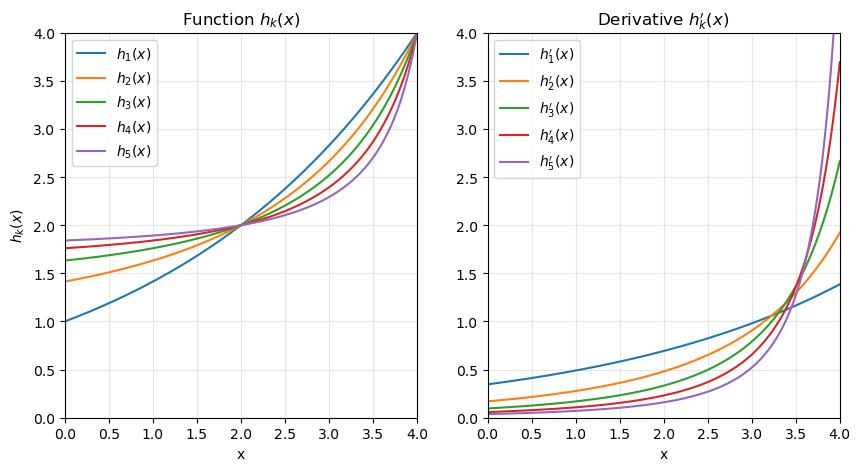

In [16]:
from autograd import grad, elementwise_grad, numpy as anp
from matplotlib import pyplot as plt
import numpy as np

def forward(functions, x):
    def rec(fs, u):
        if len(fs) == 1:
            f, = fs
            return [ f(u) ]
        v = fs[0](u)
        return [ v ] + rec(fs[1:],v)
    return anp.array([ x ] + rec(functions, x))

def backward(functions, values):
    return np.prod([ 
        elementwise_grad(functions[i])(values[i]) 
    for i in range(len(functions))], axis = 0)

def chain(functions, x):
    fwd = forward(functions, x)
    bwd = backward(functions, fwd)
    return fwd, bwd


# from 1.1 
functions = [lambda x: anp.log(x), lambda x: anp.arctan(x), lambda x: anp.sin(x)]
x = anp.exp(anp.sqrt(3))
res = chain(functions, x)
print("Forward pass (final output):", res[0][-1])
print("Backward pass (derivative at input):", res[1])

p = anp.sqrt(2)

def make_functions(p, k): 
    h1 = lambda x: p**x
    hs = [h1]
    for i in range(k-1):
        prev = hs[-1]
        hs.append(lambda x, f=prev: p**f(x))
    return hs

# Plot setup
x_vals = np.linspace(0, 4, 300)
#k_values = [1, 2, 3, 4, 5]
p = anp.sqrt(2)

# Plot h_k(x)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
functions = make_functions(p, 5)
i = 1
for f in functions:
    plt.plot(x_vals, f(x_vals), label=f'$h_{i}(x)$')
    i += 1
plt.xlabel('x')
plt.ylabel('$h_k(x)$')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.title('Function $h_k(x)$')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot h_k'(x)
plt.subplot(1, 2, 2)
functions = make_functions(p, 5)
i = 1
for f in functions:
    plt.plot(x_vals, elementwise_grad(f)(x_vals), label=f'$h_{i}\'(x)$')
    i += 1  
plt.xlabel('x')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.title('Derivative $h_k\'(x)$')
plt.legend()
plt.grid(True, alpha=0.3)


### Problem 1.3 (Exam Style)

Proof by Induction

Base cases: 
$$
\begin{align}
k = 1 : &\quad h_1(z) = h_1(z) \; \\
k = 2 : &\quad h_2(z) = \sqrt{2} \, h_1(z) = z = h_1(z)
\end{align}
$$

Inductive step:

Assume for $k \ge 2$

$$
h_k(2) = h_1(2) = 2 \quad \text{then}
$$

$$
\begin{align*}
h_{k+1}(2) &= \sqrt{2}^{h_k(2)} \\
&= \sqrt{2}^{h_1(2)} \\
&= 2 \\
&= h_1(2) \;  \\ &\quad\; \quad\; \square \\
\end{align*} \\
\\
\text{By induction we have proven that } h_k(2) = h_1(2)
$$


## Part 2: Back-Propagation for a Multi-Layer Perceptron

### Problem 2.1 (Exam Style)

### Answer) 

$U \in \Reals^{\beta\times\alpha}$

$\textbf{b} \in \Reals^\beta $ 

$V \in \Reals^{\delta\times\gamma}$

$\textbf{c} \in \Reals^\delta $

### Problem 2.2 (Exam Style)

$$
\begin{align}
\textbf{p} &= \begin{bmatrix}
-1 \\
3 \\
2
\end{bmatrix} \\
\textbf{q} &= \begin{bmatrix}
0 \\
3 \\
2
\end{bmatrix} \\
\textbf{z} &= \begin{bmatrix}
1 \\
-3
\end{bmatrix}
\end{align}
$$

### Problem 2.3 (Exam Style)

$$
\begin{align}
\lambda &= \frac{1}{2}||\textbf{z} - \textbf{y}||^2 \\
&= \frac{1}{2}\sum^d_{i=0}(z_i - y_i)^2 \\

\lambda_z &= \frac{\partial \lambda}{\partial \textbf{z}} \frac{1}{2}\sum^d_{i=0}(z_i - y_i)^2 \\
&= \sum^d_{i=0}(z_i - y_i) \\
&= \textbf{z} - \textbf{y}
\end{align}
$$
If we plug in our values we get: 
$$
\begin{align}
\lambda_z &= \textbf{z} - \textbf{y} \\
&= \begin{bmatrix}
1 \\
-3
\end{bmatrix} -
\begin{bmatrix}
-1 \\
1
\end{bmatrix} \\
&= \begin{bmatrix}
2 \\
-4
\end{bmatrix}
\end{align}
$$

### Problem 2.4 (Exam Style)

$$
\textbf{Backpropagation calculation}
$$

$$
\text{Recall that } z = Vq + c
$$

$$
\text{The Jacobian:} \quad 
\frac{\partial z}{\partial q} = V
\quad \text{or} \quad
V = 
\begin{bmatrix}
1 & -2 & 3 \\
4 & 7 & -2
\end{bmatrix}
$$

$$
\text{We also have } 
\lambda_z =
\begin{bmatrix}
2 \\ -4
\end{bmatrix},
\quad
q =
\begin{bmatrix}
3 \\ -2 \\ 1
\end{bmatrix}
$$

---

#### Components for $\lambda_q$

$$
\frac{\partial \lambda}{\partial q_j}
= \sum_i \frac{\partial \lambda}{\partial z_i}
     \frac{\partial z_i}{\partial q_j}
= \sum_i \lambda_{z_i} V_{ij}
$$

Compute for \( j = 1, 2, 3 \):

$$
\lambda_{q_1} = 2\cdot1 + (-4)\cdot4 = 2 - 16 = -14
$$

$$
\lambda_{q_2} = 2\cdot(-2) + (-4)\cdot7 = -4 - 28 = -8
$$

$$
\lambda_{q_3} = 2\cdot3 + (-4)\cdot(-2) = 6 + 8 = 14
$$

Hence

$$
\lambda_q =
\begin{bmatrix}
-14 \\ -8 \\ 14
\end{bmatrix}
$$

---

For the next step we have the function:

$$
\frac{\partial z}{\partial V} 
\text{ where }
\frac{\partial z_i}{\partial V_{ij}} = q_j
$$

---

#### Components for $\lambda_V$

$$
\frac{\partial \lambda}{\partial V_{ij}}
= \sum_k \frac{\partial \lambda}{\partial z_k}
  \frac{\partial z_k}{\partial V_{ij}}
= \lambda_{z_i} q_j
$$

We see that:

$$
\lambda_{V_{1j}} = \lambda_{z_1} q^T
\quad \text{and} \quad
\lambda_{V_{2j}} = \lambda_{z_2} q^T
$$

Thus:

$$
\lambda_V =
\begin{bmatrix}
0 & 6 & 4 \\
0 & -12 & -8
\end{bmatrix}
$$

---

For the last step we have the function:

$$
\frac{\partial z}{\partial c} = 1
$$

#### Components for  $\lambda_c$

$$
\frac{\partial \lambda}{\partial c_i}
= \sum_j \frac{\partial \lambda}{\partial z_j}
  \frac{\partial z_j}{\partial c_i}
= \lambda_{z_i}
$$

Therefore:

$$
\lambda_c = \lambda_z =
\begin{bmatrix}
2 \\ -4
\end{bmatrix}
$$


### Problem 2.5 (Exam Style)

Problem 2.5

We have

$$
q = \text{ReLU}(p)
$$

and

$$
\text{ReLU}'(p_i) =
\begin{cases}
1, & p_i > 0, \\
0, & \text{otherwise.}
\end{cases}
$$

The Jacobian:

$$
\frac{\partial q}{\partial p} =
\begin{bmatrix}
\frac{\partial q_1}{\partial p_1} & \frac{\partial q_1}{\partial p_2} & \frac{\partial q_1}{\partial p_3} \\
\frac{\partial q_2}{\partial p_1} & \frac{\partial q_2}{\partial p_2} & \frac{\partial q_2}{\partial p_3} \\
\frac{\partial q_3}{\partial p_1} & \frac{\partial q_3}{\partial p_2} & \frac{\partial q_3}{\partial p_3}
\end{bmatrix}
=
\begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

The gradient $\lambda_p$

$$
\lambda_{p_i} = \frac{\partial L}{\partial p_i}
= \sum_{j=1}^3 \frac{\partial L}{\partial q_j} \frac{\partial q_j}{\partial p_i}
$$

So we get

$$
\lambda_{p_1} = -14(0) + (-8)(0) + 14(0) = 0
$$

$$
\lambda_{p_2} = -14(0) + (-8)(1) + 14(0) = -8
$$

$$
\lambda_{p_3} = -14(0) + (-8)(0) + 14(1) = 14
$$

Therefore

$$
\lambda_p =
\begin{bmatrix}
0 \\
-8 \\
14
\end{bmatrix}
$$


### Problem 2.6 (Exam Style)

$$
\text{Recall that } \rho = Ux + b
$$

$$
\Rightarrow \frac{\partial \rho}{\partial x} = U \quad \text{or} \quad 
U = 
\begin{bmatrix}
1 & -2 \\
4 & -3 \\
0 & 1
\end{bmatrix}
$$

$$
\Rightarrow \lambda_\rho = 
\begin{bmatrix}
0 \\
-8 \\
14
\end{bmatrix}, 
\quad
x = 
\begin{bmatrix}
2 \\
1
\end{bmatrix}
$$

$$
\Rightarrow 
\frac{\partial \lambda}{\partial x_j}
= 
\sum_i \frac{\partial \lambda}{\partial \rho_i} 
\frac{\partial \rho_i}{\partial x_j}
= 
\sum_i \lambda_{\rho_i} U_{ij}
$$

$$
\Rightarrow 
\lambda_{x_1} = (1)(0) + (4)(-8) + (0)(14) = -32
$$

$$
\lambda_{x_2} = (-2)(0) + (-3)(-8) + (1)(14) = 24 + 14 = 38
$$

$$
\Rightarrow 
\lambda_x = 
\begin{bmatrix}
-32 \\
38
\end{bmatrix}
$$

$$
\text{We now see that:} \quad 
\lambda_{\rho_j} U_{ij} = \lambda_{\rho_i} x^T
$$

$$
0
\begin{bmatrix}
2 & 1
\end{bmatrix}
=
\begin{bmatrix}
0 & 0
\end{bmatrix}, 
\quad
-8
\begin{bmatrix}
2 & 1
\end{bmatrix}
=
\begin{bmatrix}
-16 & -8
\end{bmatrix}, 
\quad
14
\begin{bmatrix}
2 & 1
\end{bmatrix}
=
\begin{bmatrix}
28 & 14
\end{bmatrix}
$$

$$
\text{Hence,} \quad
\lambda U =
\begin{bmatrix}
0 & 0 \\
-16 & -8 \\
28 & 14
\end{bmatrix}
$$

$$
\text{From the previous problem, we can infer that:} \quad
\lambda b = \lambda \rho = 
\begin{bmatrix}
0 \\
-8 \\
14
\end{bmatrix}
$$


### Problem 2.7 (Exam Style)

This would be considered a bad idea because in forward-mode, you must compute full Jacobians which grow as the amount of neurons and parameters increases. Back propogation on the other hand sends back only vectors of partial derivatives, so it is not as costly and is therefore more efficient for MLPs. 
